In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
df = pd.read_csv('creditcard-training set v2.csv')

In [4]:
df.rename(inplace=True, columns={
    'Seconds since reference time':'Time',
    'Fraud? (1: Fraud, 0:  No Fraud)':'Fraud?'
})

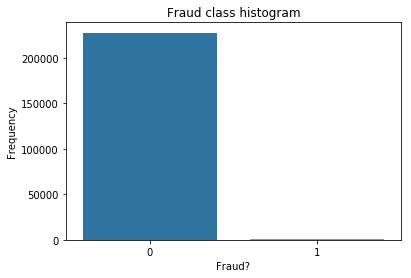

In [5]:
sns.countplot(data=df, x='Fraud?')
plt.title("Fraud class histogram")
plt.xlabel("Fraud?")
plt.ylabel("Frequency")
plt.show()

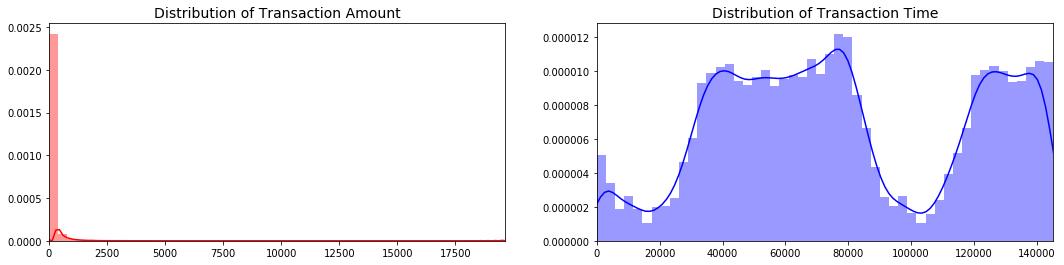

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers, scaling amount and time to range (-1,1)
df['normAmount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1, inplace=True)

# Changing position to the front
scaled_amount = df['normAmount']
scaled_time = df['normTime']

df.drop(['normAmount', 'normTime'], axis=1, inplace=True)
df.insert(0, 'normAmount', scaled_amount)
df.insert(1, 'normTime', scaled_time)

# Amount and Time are Scaled!

df.head()

,normAmount,normTime,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,1.705906,-1.007689,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,-0.279903,-1.007689,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,4.801460,-1.007675,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1.352886,-1.007675,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,0.629680,-1.007661,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [8]:
# shuffling
df = df.sample(frac=1)

# amount of fraud cases is 417
fraud_df = df.loc[df['Fraud?'] == 1]
non_fraud_df = df.loc[df['Fraud?'] == 0][:417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

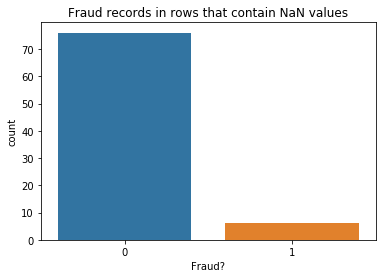

In [9]:
fig, ax = plt.subplots()
nan_df = df[df.isnull().any(axis=1)]
ax = sns.countplot(data=nan_df, x='Fraud?')
ax.set_title('Fraud records in rows that contain NaN values')
plt.show()

In [10]:
# remove null values
df.dropna(inplace=True)
df.shape

(227762, 32)

In [11]:
X = df.drop('Fraud?', axis=1)
y = df['Fraud?']

In [12]:
### I COMMENT THIS OUT FIRST BC WE DON'T INTEND TO 70-30 ANYMORE RIGHT) ###

# # split 30/70 first
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **Comparing different models**

**Testing accuracy of each model using cross-validation:**

In [ ]:
model_results = {'LR': [], 'LDA': [], 'CART': [], 'RF': [], 'NB': [], 'SVM': []}
model_results_mean = {}
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
  fraud_indices = np.array(y_train[y_train == 1].index) # indices of frauds in training set
  normal_indices = y_train[y_train == 0].index # indices of non-frauds in training set
  random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
  random_normal_indices = np.array(random_normal_indices)
  under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
  X_undersample = X_train.loc[under_sample_indices,:]
  y_undersample = y_train.loc[under_sample_indices]
  

  
  for model_info in models:
    model_name, model = model_info
    model.fit(X_undersample, y_undersample)
    score = model.score(X_test, y_test)
 

**Testing accuracy of Linear Discriminant Analysis VS Random Forest using train_test_split:**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**### BY THE WAY I REALISED I FORGOT TO RESAMPLE THIS PART FOR BOTH MODELS
but surprisingly the random forest did quite well even without resampling eh LOL**


Linear Discriminant Analysis (LDA):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68191
           1       0.88      0.76      0.81       138

   micro avg       1.00      1.00      1.00     68329
   macro avg       0.94      0.88      0.91     68329
weighted avg       1.00      1.00      1.00     68329



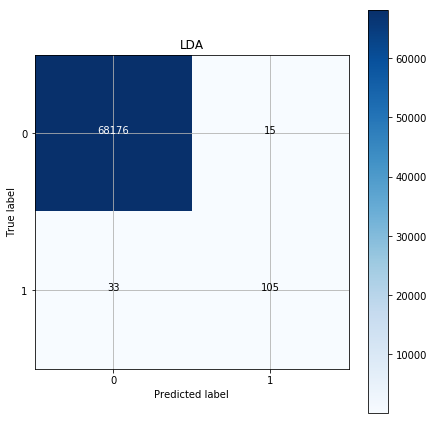

In [15]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)

plot_confusion_matrix(cm=confusion_matrix(y_test, lda_pred), classes=[0,1], title='LDA')
print(classification_report(y_test, lda_pred))

Random Forest (RF):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68191
           1       0.94      0.78      0.85       138

   micro avg       1.00      1.00      1.00     68329
   macro avg       0.97      0.89      0.93     68329
weighted avg       1.00      1.00      1.00     68329



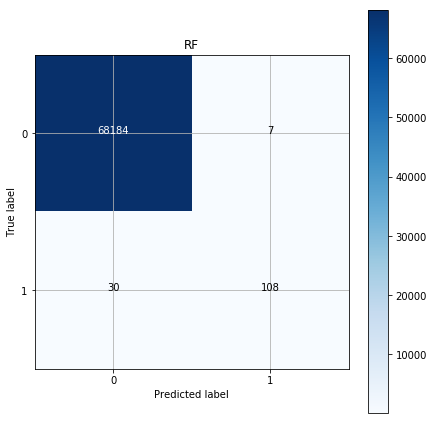

In [16]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

plot_confusion_matrix(cm=confusion_matrix(y_test, rf_pred), classes=[0,1], title='RF')
print(classification_report(y_test, rf_pred))

# Undersampling vs Oversampling

**Undersampling**

In [17]:
import statistics

In [0]:
model_results = {}
model_results_mean = {}
models = []
# models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))


kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
    fraud_indices = np.array(y_train[y_train == 1].index) # indices of frauds in training set
    normal_indices = y_train[y_train == 0].index # indices of non-frauds in training set
    random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
    random_normal_indices = np.array(random_normal_indices)
    under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
    X_undersample = X_train.loc[under_sample_indices,:]
    y_undersample = y_train.loc[under_sample_indices]
  

  
    for model_info in models:
        model_name, model = model_info
        model.fit(X_undersample, y_undersample)
        score = model.score(X_test, y_test)
        
        if model_name not in model_results:
            model_results[model_name] = []
        model_results[model_name].append(score)



LDA: 0.966867725693537 (0.017206012890376505)
RF: 0.9841530717644452 (0.004776674761261447)


In [0]:

for model, result in model_results.items():
    
    print(f'{model}: {statistics.mean(result)} ({statistics.stdev(result)})')
    
names = ['LDA', 'RF']


LDA: 0.966867725693537 (0.017206012890376505)
RF: 0.9841530717644452 (0.004776674761261447)


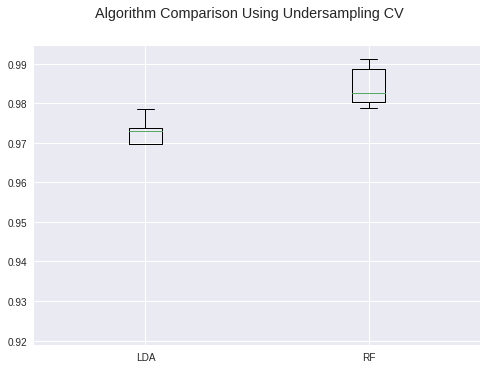

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison Using Undersampling CV')
ax = fig.add_subplot(111)
plt.boxplot(model_results.values())
ax.set_xticklabels(names)
plt.show()

**Oversampling**

In [0]:
from imblearn.over_sampling import SMOTE

kf = model_selection.KFold(n_splits=10, random_state=7)

In [0]:
import statistics

models = []
# models.append(('LR', LogisticRegression(solver='')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
    
    
    model_result = []
    for train_index, test_index in kf.split(X):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        sm = SMOTE(random_state=12, ratio = 1.0)
        X_train_oversample, y_train_oversample = sm.fit_sample(X_train, y_train)

        model.fit(X_train_oversample, y_train_oversample)
        score = model.score(X_test, y_test)

        model_result.append(score)
        
    
    results.append(model_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, statistics.mean(model_result), statistics.stdev(model_result))
    print(msg)
    


LDA: 0.987627 (0.001787)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.999457 (0.000286)


In [0]:
# from sklearn.externals import joblib
# # dump to pickle
# joblib.dump(results, 'oversamping_comparison.pkl')

# # and reload from pickle
# results = joblib.load('oversampling_comparison.pkl')
# names = ['LR', 'LDA', "CART", "RF", "NB", "SVM"]

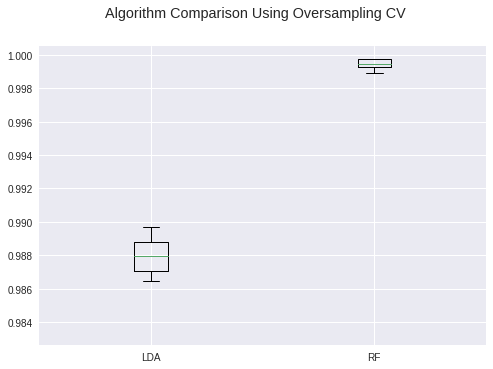

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison Using Oversampling CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Optimising model parameters:**

**Finding best parameters for Random Forest:**

In [30]:
# Number of data points in the minority class
num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
print(f"Num fraud: {num_fraud}")
fraud_indices = np.array(y_train[y_train == 1].index) # indexes of frauds in training set
print(f"Length of fraud indices: {len(fraud_indices)}")

# Picking the indices of the normal classes
normal_indices = y_train[y_train == 0].index # index of non-frauds in training set
print(f"Length of normal indices: {len(normal_indices)}")

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(f"Length of random normal indices: {len(random_normal_indices)}")

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(f"Length of under sample indices: {len(under_sample_indices)}")

# Under sample dataset
X_undersample = X_train.loc[under_sample_indices,:]
y_undersample = y_train.loc[under_sample_indices]

print(f"Length of X_undersample: {len(X_undersample)}")
print(f"Length of y_undersample: {len(y_undersample)}")

Num fraud: 288
Length of fraud indices: 288
Length of normal indices: 159145
Length of random normal indices: 288
Length of under sample indices: 576
Length of X_undersample: 576
Length of y_undersample: 576


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=12)

In [39]:
from sklearn.metrics import roc_auc_score

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid,cv=10,scoring='roc_auc')
rf_cv.fit(X_train,y_train)

y_pred_gridcv = rf_cv.predict(X_test)

print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

print("roc score:", roc_auc_score(y_test, y_pred_gridcv))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
accuracy : 0.9783637132533567
roc score: 0.9323996768112037


In [44]:
print("Tuned parameters using Grid Search: (best parameters)")
print(rf_cv.best_params_)
print("ROC score:", roc_auc_score(y_test, y_pred_gridcv))
print()
print("Tuned parameters using Randomized Search: (best parameters)")
print(rf_randomcv.best_params_)
print("ROC score:", roc_auc_score(y_test, y_pred_randomcv))

Tuned parameters using Grid Search: (best parameters)
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
ROC score: 0.9323996768112037

Tuned parameters using Randomized Search: (best parameters)
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
ROC score: 0.9260705628871532


In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(rf,param_distributions,n_iter=10,cv=10, scoring='roc_auc')
rf_randomcv.fit(X_train,y_train)

y_pred_randomcv = rf_randomcv.predict(X_test)

In [38]:
from sklearn.metrics import roc_auc_score

print("tuned hpyerparameters :(best parameters) ",rf_randomcv.best_params_)
print("accuracy :",rf_randomcv.best_score_)

print("roc score:", roc_auc_score(y_test, y_pred_randomcv))

tuned hpyerparameters :(best parameters)  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
accuracy : 0.9766360690808907
roc score: 0.9260705628871532


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid,cv=10)
rf_cv.fit(X_undersample,y_undersample)

**Feature Selection**

Features: Time, 6, 21
Finding best combination of features to drop

In [0]:
from itertools import combinations
variables_to_drop = ['normTime', 'Feature 21', 'Feature 6']
combi_to_drop = []
for i in range(1,4):
    combi_of_i = [list(tup) for tup in itertools.combinations(variables_to_drop, i)]
#     print(combi_of_i)
    combi_to_drop.extend(combi_of_i)

print(combi_to_drop)

[['normTime'], ['Feature 21'], ['Feature 6'], ['normTime', 'Feature 21'], ['normTime', 'Feature 6'], ['Feature 21', 'Feature 6'], ['normTime', 'Feature 21', 'Feature 6']]


In [0]:
name_dict = {'normTime' : 'T', 'Feature 21' : '21', 'Feature 6': '6'}

In [0]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', n_estimators = 200)

kf = KFold(n_splits=10)

combi_results = {}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
    fraud_indices = np.array(y_train[y_train == 1].index) # indices of frauds in training set
    normal_indices = y_train[y_train == 0].index # indices of non-frauds in training set
    random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
    random_normal_indices = np.array(random_normal_indices)
    under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
    X_undersample = X_train.loc[under_sample_indices,:]
    y_undersample = y_train.loc[under_sample_indices]

    # without dropping anything
    combi_name = 'None'
    
    rf.fit(X_undersample, y_undersample)
    score = rf.score(X_test, y_test)
    
    #append score of dropping nothing
    if combi_name not in combi_results:
        combi_results[combi_name] = []
    combi_results[combi_name].append(score)
  
    for combi in combi_to_drop:
        X_undersample_drop = X_undersample.drop(combi, axis=1)
        X_test_drop = X_test.drop(combi, axis=1)

        # combi_name e.g. 'D: T, 21, 6'
        combi_name = 'D:'
        for variable in combi:
            combi_name += name_dict[variable] + ', '
        combi_name = combi_name[:-2]

        rf.fit(X_undersample_drop, y_undersample)
        score = rf.score(X_test_drop, y_test)

        # append score for the current k-fold for current combi to combi results
        if combi_name not in combi_results:
            combi_results[combi_name] = []
        combi_results[combi_name].append(score)
    
for key in combi_results.keys():
    score_list_mean = np.mean(combi_results[key])
    print(f'Combi dropped: {key}, Accuracy: {score_list_mean}')

Combi dropped: None, Accuracy: 0.9902046910419049
Combi dropped: D:T, Accuracy: 0.9889835830466372
Combi dropped: D:21, Accuracy: 0.9896891166914896
Combi dropped: D:6, Accuracy: 0.9890107716240483
Combi dropped: D:T, 21, Accuracy: 0.9893634353757774
Combi dropped: D:T, 6, Accuracy: 0.9888208049674188
Combi dropped: D:21, 6, Accuracy: 0.9896890872427189
Combi dropped: D:T, 21, 6, Accuracy: 0.9886308309485965


dict_values([[0.9812805208898535, 0.9734129137276181, 0.9696147585458491, 0.9728629579375848, 0.9736770691994573, 0.9541383989145183, 0.978561736770692, 0.9223880597014925, 0.969606512890095, 0.9731343283582089], [0.9896907216494846, 0.9905046120455778, 0.9791101465002713, 0.9796472184531886, 0.9831750339213026, 0.9818181818181818, 0.991044776119403, 0.98561736770692, 0.982089552238806, 0.9788331071913161]])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


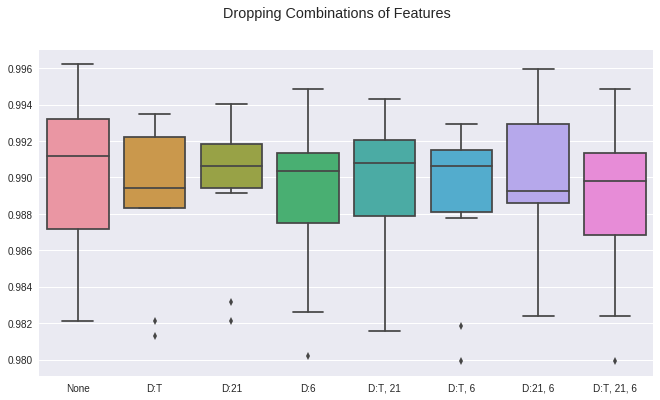

In [0]:
fig = plt.figure()
fig.suptitle('Dropping Combinations of Features')
ax = fig.add_subplot(111)
fig.set_size_inches(11, 6)
print(model_results.values())
ax = sns.boxplot(data=list(combi_results.values()))
ax.set_xticklabels(combi_results.keys())

plt.show()

# Creating final model using entire dataset

In [19]:
# undersampling

num_fraud = len(y[y == 1])
fraud_indices = np.array(y[y == 1].index)
normal_indices = np.array(y[y == 0].index)

random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

X_undersample = X.loc[under_sample_indices,:]
y_undersample = y.loc[under_sample_indices]

In [0]:
final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', n_estimators = 200)
final_model.fit(X_undersample, y_undersample)


SyntaxError: ignored